
# ![eda.png](https://raw.githubusercontent.com/NoufJoh/Pave-the-way-Capstone-Project/main/imgs/EDA_notebook.png)



**Notebook Contents**:
* [Load Data from Github ](##A1)
* [Importing Libraries](##A2)
* [EDA](##A3)
* [Preprocessing](##A4)
 * [Annotations](##A5)
 * [Resize images to grayscale](##A6)
 * [Resize images with aspect ratio](##A7)
 * [Resize bounding boxes based on image dimensions](##A8)
 * [Pipeline to apply all preprocessing steps](##A9)
 * [Split data (train, valid, test](##A0)
 * [Save data to repo](##A00)

Data Source: [Road Damage Dataset](https://www.kaggle.com/datasets/prudhvignv/road-damage-classification-and-assessment)



## <a name="#A1">Load Data from Github</a>

In [1]:
# clone repo. to access dataset.
!git clone https://github.com/NoufJoh/pave-the-way-Capstone-Project.git

Cloning into 'pave-the-way-Capstone-Project'...
remote: Enumerating objects: 3860, done.
remote: Counting objects: 100% (935/935), done.
remote: Compressing objects: 100% (772/772), done.
remote: Total 3860 (delta 182), reused 889 (delta 159), pack-reused 2925
Receiving objects: 100% (3860/3860), 1.34 GiB | 30.15 MiB/s, done.
Resolving deltas: 100% (203/203), done.
Updating files: 100% (7675/7675), done.




## <a name="#A2">Importing Libariers</a>

In [17]:
# import all libariers
import cv2
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests
import imgaug.augmenters as iaa
import glob
import random
import shutil
from google.colab import drive


## <a name="#A3">EDA</a>




First step to explore the dataset.

In [3]:
# this function loads images from folders of dataset, including the two classess poor and very_poor
def load_images_from_folders(folder_paths):
    all_images = []
    for folder_path in folder_paths:
        images = []
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path)
                images.append(img)
            except IOError:
                print("Error loading image:", img_path)
        all_images.extend(images)
    return all_images

folder1_path = '/content/pave-the-way-Capstone-Project/raw_data/poor'
folder2_path = '/content/pave-the-way-Capstone-Project/raw_data/very_poor'
all_folders = [folder1_path, folder2_path]
all_images = load_images_from_folders(all_folders)


/content/pave-the-way-Capstone-Project/raw_data
Number of images: 714


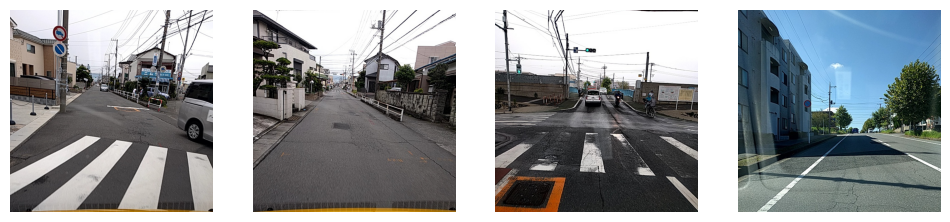

Number of categories:  2
Number of poor roads images:  396
Number of very poor roads images:  318
Types of categories:  ['poor', 'very_poor']
Image Shape Statistics:
Minimum Shape: [180 169]
Maximum Shape: [3840 5760]
Mean Shape: [630.06022409 786.33613445]
Standard Deviation Shape: [346.60430464 528.10271278]


In [4]:
# this is to print out all the statstics of the dataset.
# here we are accessing the raw dataset.
%cd /content/pave-the-way-Capstone-Project/raw_data
# Number of Images
num_images = len(all_images)
print(f"Number of images: {num_images}")

# Sample Image Visualization
num_samples_to_visualize = 4
plt.figure(figsize=(12, 8))
for i in range(num_samples_to_visualize):
    image = all_images[i]  # Taking images from the first four images in all_images
    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

# Image Statistics
image_shapes = [np.array(img).shape[:2] for img in all_images]

image_shapes = np.array(image_shapes)
image_shapes = np.array(image_shapes)
dir = os.getcwd()
class1 = len(os.listdir(dir + '/poor'))
class2 = len(os.listdir(dir + '/very_poor'))

print('Number of categories: ', len(os.listdir(dir)))
print('Number of poor roads images: ', class1)
print('Number of very poor roads images: ', class2)
print('Types of categories: ',os.listdir(dir))
print("Image Shape Statistics:")
print(f"Minimum Shape: {image_shapes.min(axis=0)}")
print(f"Maximum Shape: {image_shapes.max(axis=0)}")
print(f"Mean Shape: {image_shapes.mean(axis=0)}")
print(f"Standard Deviation Shape: {image_shapes.std(axis=0)}")


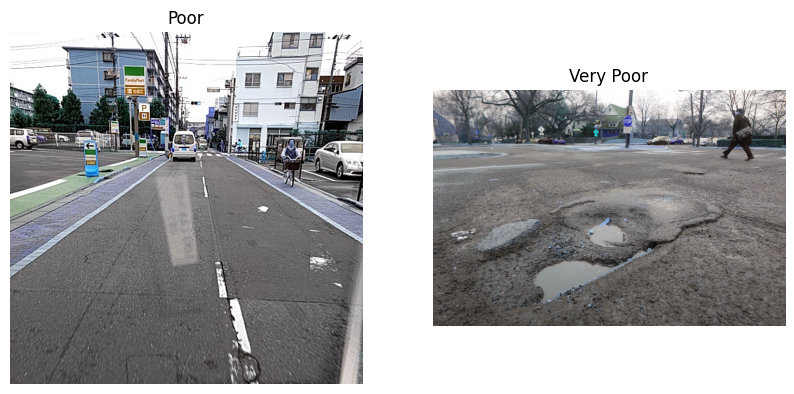

In [5]:
# this is to show an example of each class.
# it can be noticed that poor image is the image with the small damage or cracks
# while the very_poor image contains a pothole so large damages.


# create figure
fig = plt.figure(figsize=(10, 10))

# reading images
Image1 = cv2.imread('/content/pave-the-way-Capstone-Project/raw_data/poor/poor_001.jpg')
Image2 = cv2.imread('/content/pave-the-way-Capstone-Project/raw_data/very_poor/verypoor_005.jpg')

# check if images were read correctly
if Image1 is None:
    print("Image1 could not be read")
if Image2 is None:
    print("Image2 could not be read")

# Adds a subplot at the 1st image
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Poor")

# Adds a subplot at the 2nd image
fig.add_subplot(1, 2, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Very Poor")

plt.show()

In [6]:
# transform the data into a dataframe:
data = []
for classes in sorted(os.listdir(dir)):
    for images in sorted(os.listdir(dir + '/'+classes)):
        data.append((classes, images))

df = pd.DataFrame(data, columns=['Classes', 'images'])
print (df)

       Classes            images
0         poor      poor_001.jpg
1         poor      poor_002.jpg
2         poor      poor_003.jpg
3         poor      poor_004.jpg
4         poor      poor_005.jpg
..         ...               ...
709  very_poor  verypoor_325.jpg
710  very_poor  verypoor_326.jpg
711  very_poor  verypoor_327.jpg
712  very_poor  verypoor_328.jpg
713  very_poor  verypoor_329.jpg

[714 rows x 2 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Classes  714 non-null    object
 1   images   714 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


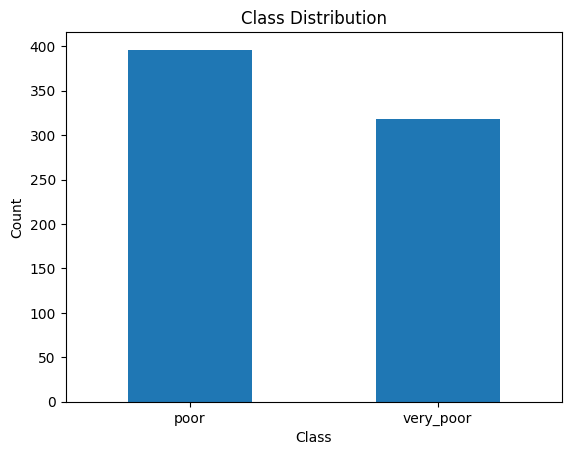

In [8]:
# check the balance of the data:
df['Classes'].value_counts().plot(kind='bar', xlabel='Class', ylabel='Count', rot=0, title='Class Distribution')
plt.show()

## <a name="#4">Preprocessing</a>

### <a name="#A5">1. Annotations</a>
the dataset has been annotated using ModifiedOpenLabelling [Here](https://github.com/ivangrov/ModifiedOpenLabelling/tree/main), and it was uploaded to github to data_annote



/content/pave-the-way-Capstone-Project


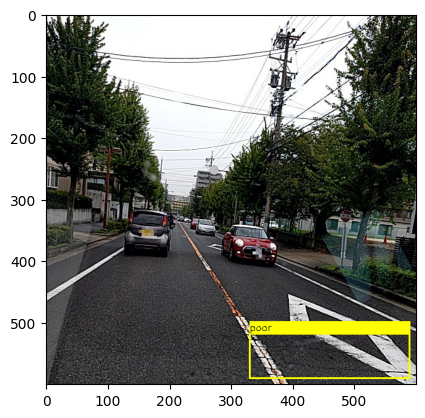

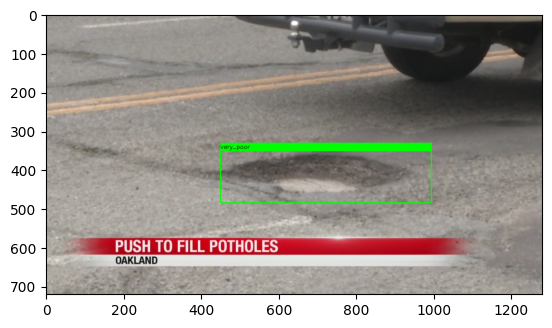

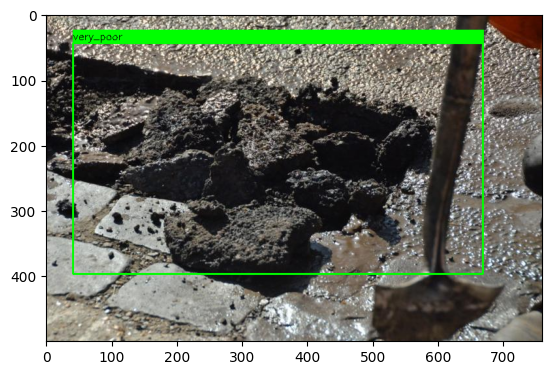

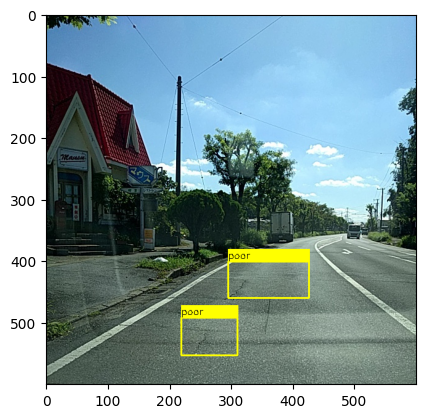

In [9]:
# show four random images from the annotated dataset
%cd ..
import random
num_samples = 4
image_dir = '/content/pave-the-way-Capstone-Project/data/data_annote/'
all_images = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')]
num_images = len(all_images)
class_list = ['very_poor', 'poor']
colors = [(0, 255, 0), (0, 255, 255)]

for i in range(num_samples):
    j = random.randint(0,num_images-1)
    image_path = all_images[j]
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    label_path = os.path.splitext(image_path)[0] + '.txt'
    with open(label_path, "r") as file1:
        for line in file1.readlines():
            split = line.split(" ")

            # getting the class id
            class_id = int(split[0])
            color = colors[class_id]
            clazz = class_list[class_id]

            # getting the xywh bounding box coordinates
            x, y, w, h = float(split[1]), float(split[2]), float(split[3]), float(split[4])

            # re-scaling xywh to the image size
            box = [int((x - 0.5*w)* width), int((y - 0.5*h) * height), int(w*width), int(h*height)]
            cv2.rectangle(image, box, color, 2)
            cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
            cv2.putText(image, class_list[class_id], (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))

    #cv2.imshow("output", image)
    #cv2.waitKey()
    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [10]:
# this step to prepare the data for the remaining preprocessing steps:

# separate the images and labels into two different folders
source_directory = "/content/pave-the-way-Capstone-Project/data/data_annote"
image_folder = "/content/pave-the-way-Capstone-Project/data/data_annotes/images"
label_folder = "/content/pave-the-way-Capstone-Project/data/data_annotes/labels"

# Create destination folders if they don't exist
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

if not os.path.exists(label_folder):
    os.makedirs(label_folder)

# Iterate over files in the source directory
for filename in os.listdir(source_directory):
    file_path = os.path.join(source_directory, filename)

    # Check if the file is an image (you can customize this condition based on your file extensions)
    if filename.lower().endswith((".png", ".jpg", ".jpeg", ".gif")):
        # Move image files to the image destination folder
        shutil.move(file_path, os.path.join(image_folder, filename))
        #print(f"Moved {filename} to {image_folder}")
    else:
        # Move text files to the text destination folder
        shutil.move(file_path, os.path.join(label_folder, filename))
        #print(f"Moved {filename} to {label_folder}")




### <a name="#A6">2. Convert images to grayscale</a>


In [11]:
def convert_to_grayscale(image_list):
    grayscale_images = []
    for img in image_list:
        # Convert image to grayscale
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(gray_image)
    return grayscale_images



### <a name="#A7">3. Resize images with aspect ratio</a>


In [12]:
def resize_with_aspect_ratio(image_list, target_size=(516, 516)):
    resized_images = []
    for image in image_list:
        aspect_ratio = image.shape[1] / image.shape[0]
        target_width = int(target_size[0])
        target_height = int(target_width / aspect_ratio)
        resized_image = cv2.resize(image, (target_width, target_height))
        resized_images.append(resized_image)
    return resized_images




### <a name="#A8">4. Resize bounding boxes based on image dimensions</a>


In [13]:
def resize_bounding_boxes(bounding_boxes, original_width, original_height, target_width, target_height):
    scale_x = target_width / original_width
    scale_y = target_height / original_height
    resized_bounding_boxes = []
    for box in bounding_boxes:
        class_index, x_center, y_center, width, height = box
        x_center_resized = x_center * scale_x
        y_center_resized = y_center * scale_y
        width_resized = width * scale_x
        height_resized = height * scale_y
        resized_bounding_boxes.append((class_index, x_center_resized, y_center_resized, width_resized, height_resized))
    return resized_bounding_boxes



### <a name="#A9">5. Pipeline to apply the preprocessing steps</a>


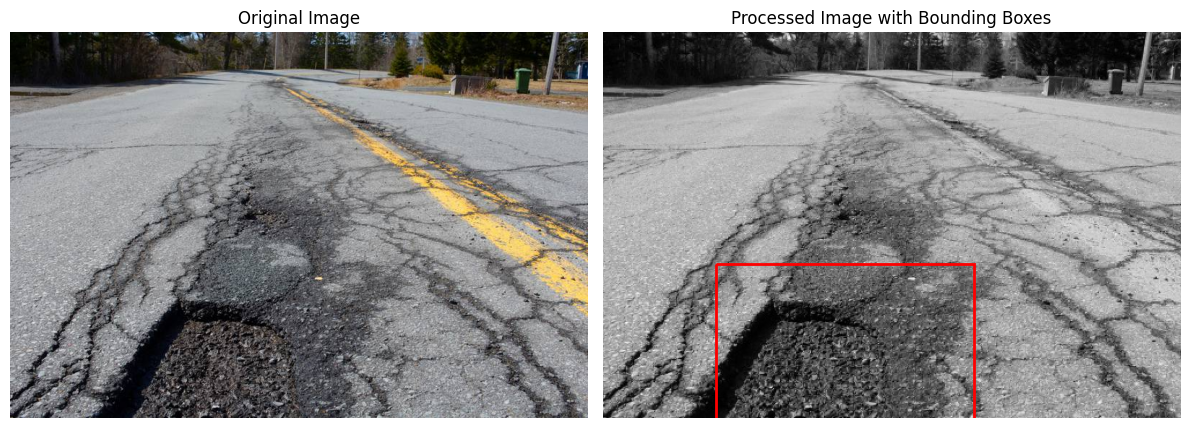

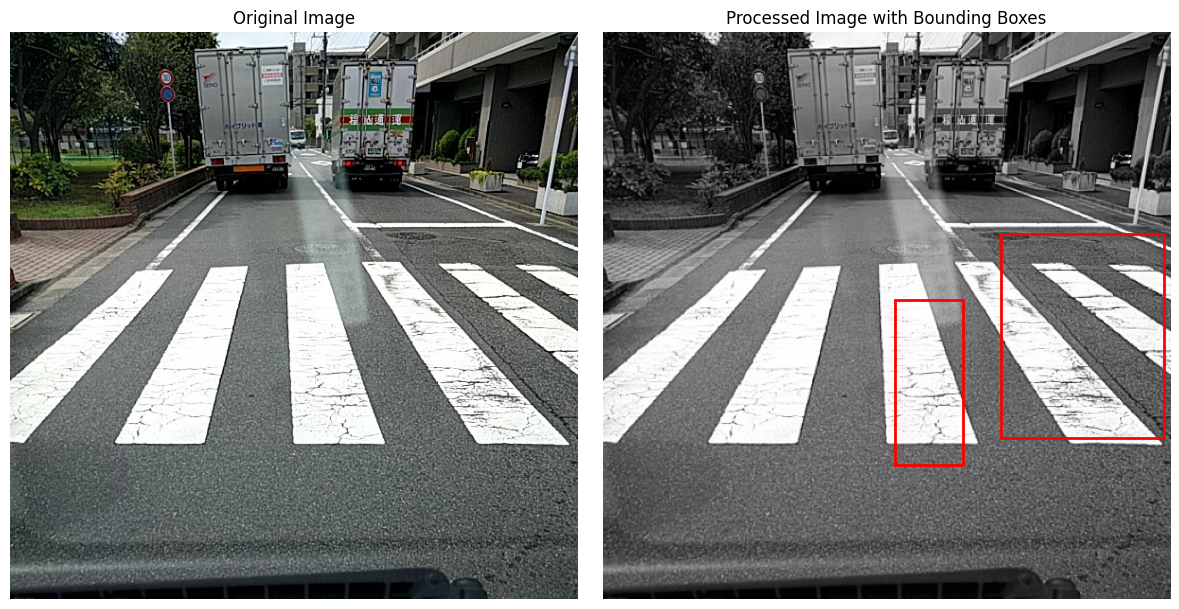

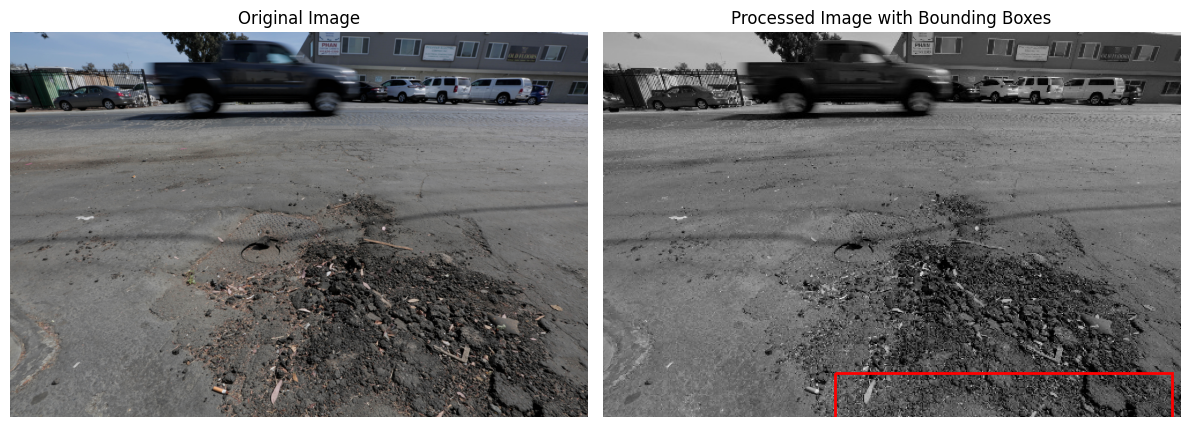

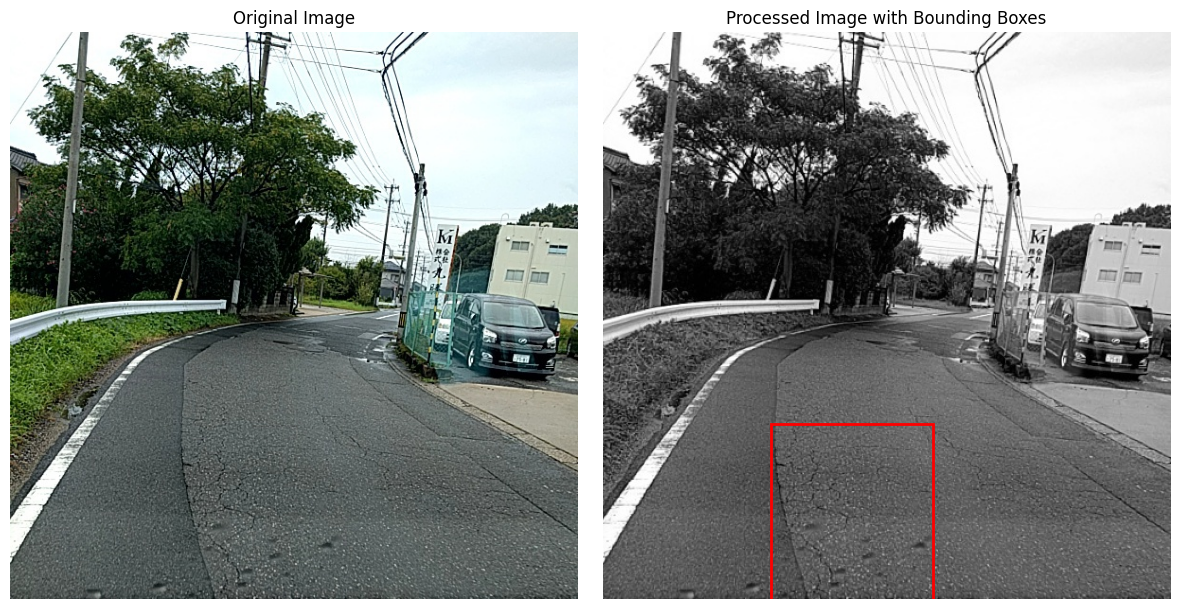

In [14]:
# Paths
input_image_folder = '/content/pave-the-way-Capstone-Project/data/data_annotes/images'
input_label_folder = '/content/pave-the-way-Capstone-Project/data/data_annotes/labels'
normalized_output_image_folder = '/content/pave-the-way-Capstone-Project/data/pre_data/images'
normalized_output_label_folder = '/content/pave-the-way-Capstone-Project/data/pre_data/labels'
target_size = (500, 500)  # Set the desired target size

# Create output directories if they don't exist
os.makedirs(normalized_output_image_folder, exist_ok=True)
os.makedirs(normalized_output_label_folder, exist_ok=True)

# List of image files to process
image_files_to_process = os.listdir(input_image_folder)

for image_file in image_files_to_process:
    image_path = os.path.join(input_image_folder, image_file)
    label_file = os.path.splitext(image_file)[0]
    label_path = os.path.join(input_label_folder, label_file + '.txt')

    # Load the image and its corresponding label file
    image = Image.open(image_path)
    with open(label_path, 'r') as f:
        lines = f.readlines()
        bounding_boxes = [list(map(float, line.strip().split())) for line in lines]

    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

    # Apply the resizing and normalization steps
    resized_image = resize_with_aspect_ratio([grayscale_image], target_size=target_size)[0]
    normalized_resized_image = (resized_image.astype(np.float32) - resized_image.min()) / (resized_image.max() - resized_image.min())

    # Update bounding box coordinates based on the resized image dimensions
    if len(resized_image.shape) == 3:
        original_height, original_width, _ = resized_image.shape  # For color images
    else:
        original_height, original_width = resized_image.shape  # For grayscale images
    resized_bounding_boxes = resize_bounding_boxes(bounding_boxes, original_width, original_height, target_size[0], target_size[1])

    # Convert bounding box coordinates to normalized values
    normalized_bounding_boxes = []
    for box in resized_bounding_boxes:
        class_index, x_center, y_center, width, height = box
        x_center_resized = x_center / original_width
        y_center_resized = y_center / original_height
        width_resized = width / original_width
        height_resized = height / original_height
        normalized_bounding_boxes.append((class_index, x_center_resized, y_center_resized, width_resized, height_resized))

    # Save the normalized processed image
    normalized_output_image_path = os.path.join(normalized_output_image_folder, image_file)
    cv2.imwrite(normalized_output_image_path, (normalized_resized_image * 255).astype(np.uint8))

    # Save the normalized label file with normalized bounding box coordinates
    normalized_output_label_path = os.path.join(normalized_output_label_folder, label_file + '.txt')
    with open(normalized_output_label_path, 'w') as f:
        for box in normalized_bounding_boxes:
            class_index, x_center, y_center, width, height = box
            f.write(f'{int(class_index)} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n')

# Choose 4 random processed images for display
processed_image_files = os.listdir(normalized_output_image_folder)  # Corrected path
random_processed_image_files = random.sample(processed_image_files, 4)

# Display 4 random processed images with their original versions and bounding boxes
for image_file in random_processed_image_files:
    original_image_path = os.path.join(input_image_folder, os.path.splitext(image_file)[0] + '.jpg')
    processed_image_path = os.path.join(normalized_output_image_folder, image_file)
    label_file_path = os.path.join(normalized_output_label_folder, os.path.splitext(image_file)[0] + '.txt')

    original_image = cv2.imread(original_image_path)
    processed_image = cv2.imread(processed_image_path)

    # Load bounding boxes from label file
    bounding_boxes = []
    with open(label_file_path, 'r') as f:
        lines = f.readlines()
        bounding_boxes = [list(map(float, line.strip().split())) for line in lines]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image with Bounding Boxes')
    for box in bounding_boxes:
        class_index, x_center, y_center, width, height = box
        x_min_resized = int((x_center - width / 2) * 516 * processed_image.shape[1])
        y_min_resized = int((y_center - height / 2) * 516 * processed_image.shape[0])
        x_max_resized = int((x_center + width / 2) * 516 * processed_image.shape[1])
        y_max_resized = int((y_center + height / 2) * 516 * processed_image.shape[0])
        plt.gca().add_patch(plt.Rectangle((x_min_resized, y_min_resized), x_max_resized - x_min_resized, y_max_resized - y_min_resized, fill=False, edgecolor='red', linewidth=2))
    plt.axis('off')

    plt.tight_layout()
    plt.show()


### <a name="#A0">6. Split data into train, valid and test</a>

Data splitted to 70%, 10%, 20%

Run the code below or use

```
%run split_data.py


In [15]:
def split_data(input_folder, output_folder, train_ratio, valid_ratio, test_ratio):
    assert train_ratio + valid_ratio + test_ratio == 1.0, "Split ratios should add up to 1.0"

    # Create output folders for train, validation, and test sets
    os.makedirs(os.path.join(output_folder, "train", "images"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, "train", "labels"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, "valid", "images"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, "valid", "labels"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, "test", "images"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, "test", "labels"), exist_ok=True)

    image_folder = os.path.join(input_folder, "images")
    label_folder = os.path.join(input_folder, "labels")

    # Get list of all image files in the input folder
    image_files = os.listdir(image_folder)

    # Shuffle the image files
    random.shuffle(image_files)

    total_images = len(image_files)
    num_train = int(total_images * train_ratio)
    num_valid = int(total_images * valid_ratio)

    # Copy files to respective train, validation, and test folders
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(image_folder, image_file)
        label_file = image_file.split(".")[0] + ".txt"
        label_path = os.path.join(label_folder, label_file)

        if i < num_train:
            shutil.copy(img_path, os.path.join(output_folder, "train", "images"))
            shutil.copy(label_path, os.path.join(output_folder, "train", "labels"))
        elif i < num_train + num_valid:
            shutil.copy(img_path, os.path.join(output_folder, "valid", "images"))
            shutil.copy(label_path, os.path.join(output_folder, "valid", "labels"))
        else:
            shutil.copy(img_path, os.path.join(output_folder, "test", "images"))
            shutil.copy(label_path, os.path.join(output_folder, "test", "labels"))

if __name__ == "__main__":
    input_folder = "/content/pave-the-way-Capstone-Project/data/pre_data"  # Specify the path to your input folder
    output_folder = "/content/pave-the-way-Capstone-Project/data/splited_data"  # Specify the path to your output folder
    train_ratio = 0.70  # Change the split ratios as desired
    valid_ratio = 0.10
    test_ratio = 0.20

    split_data(input_folder, output_folder, train_ratio, valid_ratio, test_ratio)



## <a name="#A00">Save Data to Upload to repo</a>
# ![save_file.png](https://raw.githubusercontent.com/NoufJoh/Pave-the-way-Capstone-Project/main/imgs/save%20file.png)



In [ ]:
# this step helps in saving all the files to prepare for uploading to repo.
# save to drive
# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to the folder to save
folder_path = '/content/pave-the-way-Capstone-Project/data/splited_data'

# Specify the path to the destination folder in Google Drive
destination_path = '/content/drive/MyDrive/SIC/splited_data'

# Copy the entire folder to your Google Drive
shutil.copytree(folder_path, destination_path)

# ![end.png](https://raw.githubusercontent.com/NoufJoh/Pave-the-way-Capstone-Project/main/imgs/end.png)